In [1]:
# Let's import the libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
from pyspark.sql import functions as sf

In [2]:
conf = pyspark.SparkConf()
sc = pyspark.SparkContext.getOrCreate()
sqlcontext = SQLContext(sc)
spark = SparkSession.builder.appName('Practice').getOrCreate()
spark 

c:\Users\Amine\anaconda3\lib\site-packages\pyspark\sql\context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [3]:
# Read the files 
sparkdata = spark.read.csv('ClassDiabetes.csv', header='true')
sparkdata.show(10)

+---+------------+-------+-------------------+--------------------+------------------+-----------+----------+--------------------+-----------------+-----------+-----------+--------------------+-----------------+--------------+-----------------+-----------------+-----------------+-------------+------+-------+--------------------+-----------------+
|_c0|Diabetes_012| HighBP|           HighChol|           CholCheck|               BMI|     Smoker|    Stroke|HeartDiseaseorAttack|     PhysActivity|     Fruits|    Veggies|   HvyAlcoholConsump|    AnyHealthcare|   NoDocbcCost|          GenHlth|         MentHlth|         PhysHlth|     DiffWalk|   Sex|    Age|           Education|           Income|
+---+------------+-------+-------------------+--------------------+------------------+-----------+----------+--------------------+-----------------+-----------+-----------+--------------------+-----------------+--------------+-----------------+-----------------+-----------------+-------------+------+-

In [4]:
# select the columns for frequent items
sparkdata = sparkdata.select( '_c0' ,
        concat(lit("["), 
            col("Diabetes_012"), lit(","), 
            col("HighBP"), lit(","), 
            col("HighChol"), lit(","), 
            col("CholCheck"), lit(","),
            col("BMI"), lit(","),
            col("Smoker"), lit(","),
            col("Stroke"), lit(","),
            col("HeartDiseaseorAttack"), lit(","),
            col("PhysActivity"), lit(","),
            col("Fruits"), lit(","),
            col("Veggies"), lit(","),
            col("HvyAlcoholConsump"), lit(","),
            col("AnyHealthcare"), lit(","),
            col("NoDocbcCost"), lit(","),
            col("GenHlth"), lit(","),
            col("MentHlth"), lit(","),
            col("PhysHlth"), lit(","),
            col("DiffWalk"), lit("]")
        ).alias('item')  
    )

In [5]:
# convert the item colum from string to array
data = sparkdata.select(split(col("item"),",").alias("items")).drop('item')
data.printSchema()

root
 |-- items: array (nullable = true)
 |    |-- element: string (containsNull = true)



**DFPS**

In [6]:
import time
start_time = time.time()
# set the parameters for model
fp = FPGrowth(minSupport=0.2, minConfidence=0.7)
# fit the fp growth model
model = fp.fit(data)

In [7]:
# Display frequent itemsets.
model.freqItemsets.show()
items = model.freqItemsets
# Display generated association rules.
model.associationRules.show()
rules = model.associationRules

c:\Users\Amine\anaconda3\lib\site-packages\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+--------------------+-----+
|               items| freq|
+--------------------+-----+
|      [Good GenHlth]|13457|
|[Good GenHlth, Ye...|10308|
|[Good GenHlth, Ye...|10043|
|[Good GenHlth, Ye...| 9982|
|[Good GenHlth, Ye...| 9982|
|[Good GenHlth, Ye...|10043|
|[Good GenHlth, Ye...| 9538|
|[Good GenHlth, Ye...| 9298|
|[Good GenHlth, Ye...| 9252|
|[Good GenHlth, Ye...| 9252|
|[Good GenHlth, Ye...| 9298|
|[Good GenHlth, Ye...| 8947|
|[Good GenHlth, Ye...| 8714|
|[Good GenHlth, Ye...| 8671|
|[Good GenHlth, Ye...| 8671|
|[Good GenHlth, Ye...| 8714|
|[Good GenHlth, Ye...| 8902|
|[Good GenHlth, Ye...| 8902|
|[Good GenHlth, Ye...| 8751|
|[Good GenHlth, Ye...| 8528|
+--------------------+-----+
only showing top 20 rows

+--------------------+--------------------+------------------+------------------+-------------------+
|          antecedent|          consequent|        confidence|              lift|            support|
+--------------------+--------------------+------------------+------------

In [8]:
# Convert the Spark DataFrame  to a Pandas DataFrame
result_pdf = items.select("*").toPandas()
result_pdf

,items,freq
0,[Good GenHlth],13457
1,"[Good GenHlth, Yes Veggies]",10308
2,"[Good GenHlth, Yes Veggies, No HvyAlcoholConsump]",10043
3,"[Good GenHlth, Yes Veggies, No HvyAlcoholConsu...",9982
4,"[Good GenHlth, Yes Veggies, No HvyAlcoholConsu...",9982
...,...,...
30004,"[Yes Fruits , Poor MentHlth, Yes AnyHealthcare...",16608
30005,"[Yes Fruits , Poor MentHlth, Yes AnyHealthcare...",16608
30006,"[Yes Fruits , Poor MentHlth, Yes AnyHealthcare...",16681
30007,"[Yes Fruits , Poor MentHlth, [Diabetes]",17247


In [9]:
# save the results 
result_pdf.to_csv('frequentitemsClassDiabete.csv')

In [ ]:
# Convert the Spark DataFrame  to a Pandas DataFrame
rules_pdf = rules.select("*").toPandas()
# save the results 
rules_pdf.to_csv('ConseConfLiftClassDiabete.csv')
rules_pdf.head()

In [19]:
end_time = time.time()
total_time = end_time - start_time
print("Time: ", total_time)

Time:  218.6265778541565


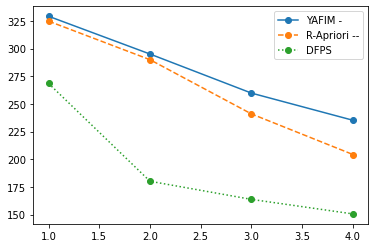

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4])
yyafim = np.array([329.20,295.05,259.75,235.22])

yrapriori = np.array([324.78,289.94,240.94,204.28])
ydfps = np.array([268.53,180.10,163.73,150.60])
plt.plot(x, yyafim, "o-", label="YAFIM -")
plt.plot(x, yrapriori, "o--", label="R-Apriori --")
plt.plot(x, ydfps, "o:", label="DFPS ")

plt.legend()

plt.show()

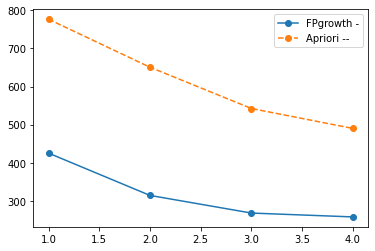

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4])
yfpgrowth  = np.array([425.14,314.09,267.80,257.68])

yapriori = np.array([776.54,650.55,542.24,489.93])
plt.plot(x, yfpgrowth , "o-", label="FPgrowth -")
plt.plot(x,yapriori, "o--", label="Apriori --")


plt.legend()

plt.show()